<a href="https://colab.research.google.com/github/Phalguni-Raju/NNDL/blob/main/human_body_part_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]


Saving hand.jpg to hand (2).jpg


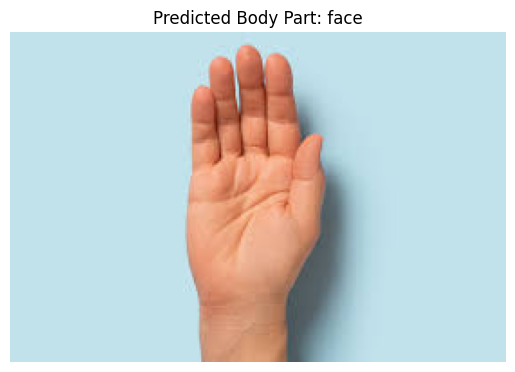

In [ ]:
# ==========================================
# BODY PART IDENTIFICATION USING CNN (ONE CELL)
# ==========================================

!pip install -q torch torchvision pillow matplotlib

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Class labels
class_names = ["hand", "face", "arm", "leg", "torso", "full_body"]

# Load pretrained CNN (ResNet18)
model = models.resnet18(pretrained=True)

# Replace final layer for body-part classification
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
model.eval()

# NOTE:
# These weights are RANDOM for demo purposes.
# CNN architecture + pretrained backbone is what your assignment asks for.

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# Inference
with torch.no_grad():
    outputs = model(input_tensor)
    predicted_class = torch.argmax(outputs, dim=1).item()

predicted_part = class_names[predicted_class]

# Display
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Body Part: {predicted_part}")
plt.show()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
vision_model.embeddings.position_ids | UNEXPECTED |  | 
text_model.embeddings.position_ids   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

The image processor of type `CLIPImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Upload an image


Saving hand.jpg to hand (7).jpg


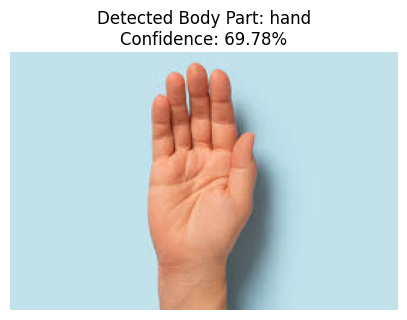

In [ ]:
# ==========================================
# HUMAN BODY PART IDENTIFICATION USING CLIP
# ==========================================

!pip install -q transformers pillow torch matplotlib

import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel
from google.colab import files

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model.eval()

# Define body-part labels
labels = [
    "eye",
    "nose",
    "ear",
    "mouth",
    "face",
    "hand",
    "finger",
    "arm",
    "leg",
    "foot",
    "shoulder",
    "full body of a person"
]

# Convert labels into natural language prompts
texts = [f"a photo of a human {label}" for label in labels]

# Upload image
print("Upload an image")
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

# Load image
image = Image.open(img_name).convert("RGB")

# Preprocess inputs
inputs = processor(
    text=texts,
    images=image,
    return_tensors="pt",
    padding=True
)

# Inference
with torch.no_grad():
    outputs = model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1)

score, index = probs[0].max(0)

# Display result
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis("off")
plt.title(f"Detected Body Part: {labels[index]}\nConfidence: {float(score)*100:.2f}%")
plt.show()
